# Load the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sbn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

print("Libraries have been loaded.")

Libraries have been loaded.


# Read the dataset

In [2]:
df = pd.read_csv('./datasets/iris_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


It shows that 'petal_width_cm' has only 145 rows instaed of 150.
So we need to remove those rows for all the columns

In [3]:
df = df.dropna()
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


Now all the rows have only 145 rows, so the dataset is organized.

In [4]:
# Describe the dataset
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Correlate the different columns of the dataset
df.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.073926,0.480736,0.469734
sepal_width_cm,0.073926,1.000000,-0.411939,-0.348464
petal_length_cm,0.480736,-0.411939,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


In [6]:
# Correlate "petal_length_cm" with "petal_width_cm"
df["petal_length_cm"].corr(df["petal_width_cm"])

0.9589339013907308

In [7]:
# Correlate "sepal_length_cm" with "sepal_width_cm"
df["sepal_length_cm"].corr(df["sepal_width_cm"])

0.0739256690880985

Lets see the types of values for the class column

In [8]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from the above results.
 
For 5 data points 'Iris-versicolor' has been specified as 'versicolor'. 
For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

So lets change the values for the class columns

In [9]:
df['class'].replace(to_replace = ["Iris-setossa", "versicolor"], value = ["Iris-setosa","Iris-versicolor"], inplace = True)
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

# Simple Logistic Regression
Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [10]:
final_df = df[df['class'] != 'Iris-virginica']
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Outlier Check

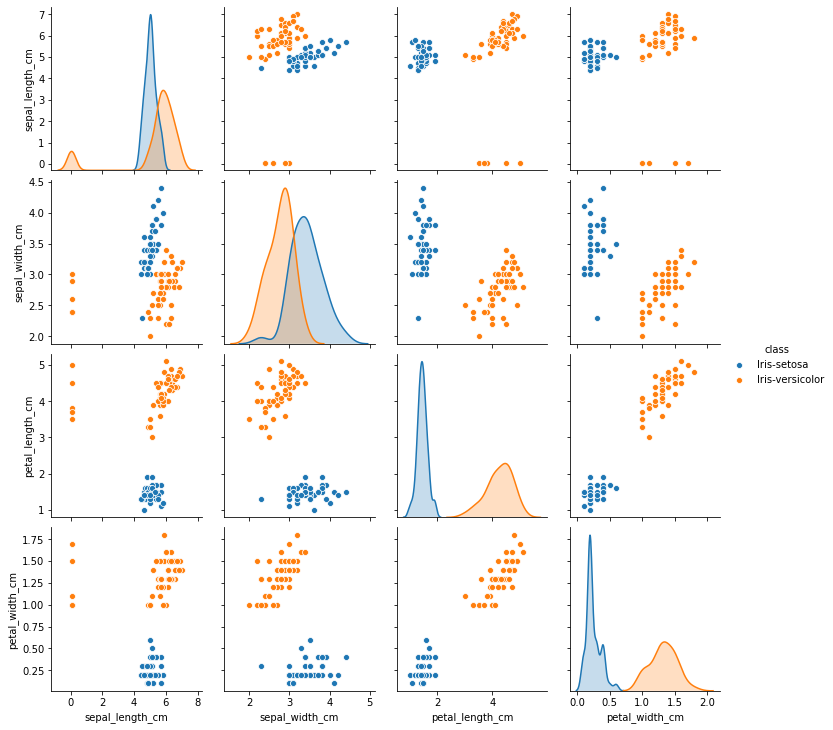

In [11]:
# Check for the outliers
sbn.pairplot(final_df, hue = "class", height = 2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

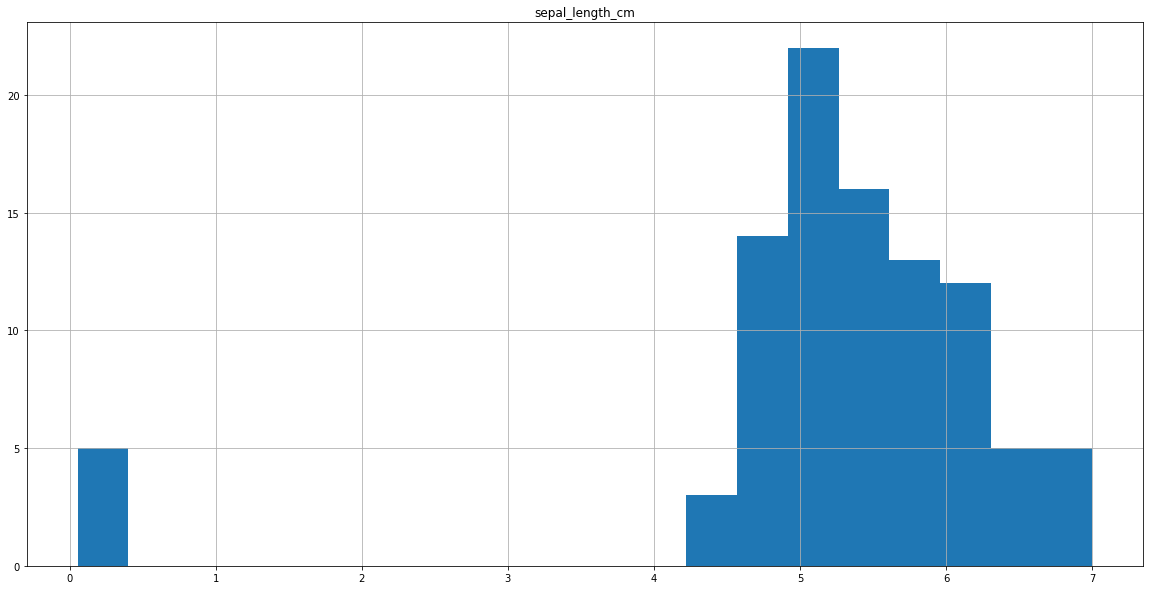

In [12]:
final_df.hist(column = 'sepal_length_cm', bins = 20, figsize = (20, 10))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. 

So, these data points are considered to be in 'm' and are converted to 'cm'.

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

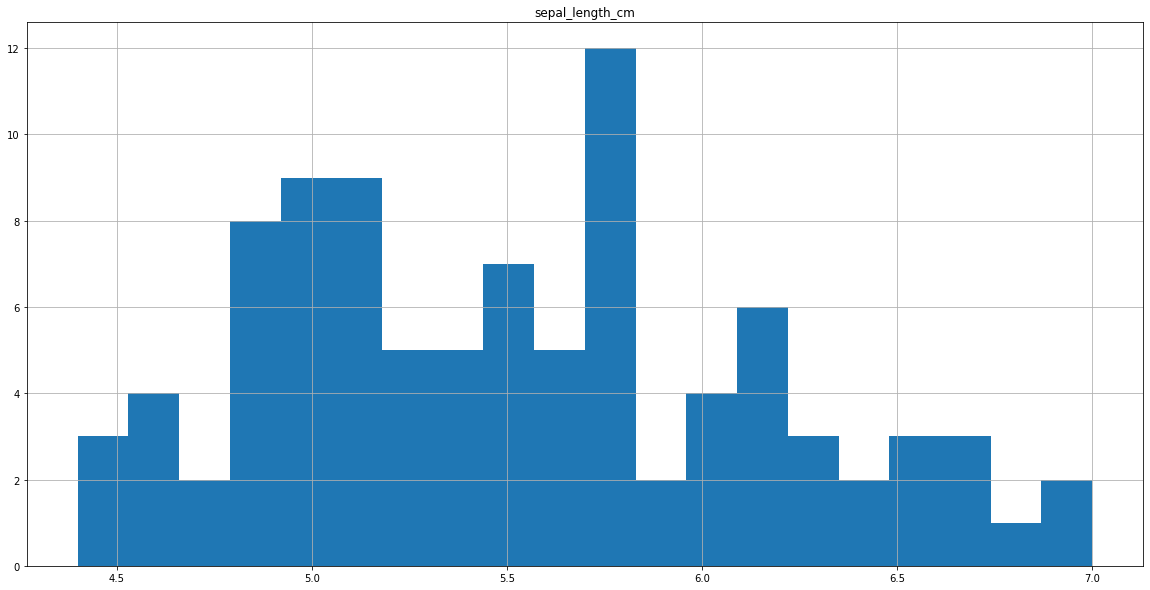

In [14]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm'] * 100
final_df.hist(column = 'sepal_length_cm', bins = 20, figsize = (20, 10))

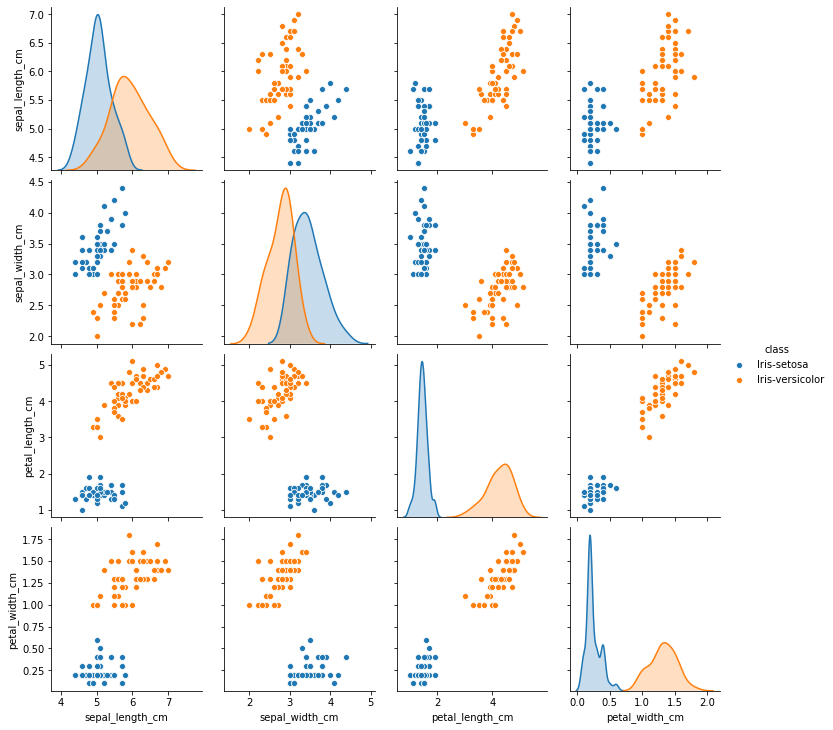

In [15]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)
sbn.pairplot(final_df, hue = "class", height = 2.5)

Successfully removed outliers!!

# Label Encoding

In [16]:
final_df['class'].replace(to_replace = ["Iris-setosa", "Iris-versicolor"], value = [1,0], inplace = True)

In [17]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [18]:
inp_df = final_df.drop(final_df.columns[[4]], axis = 1)
out_df = final_df.drop(final_df.columns[[0, 1, 2, 3]], axis = 1)

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size = 0.2, random_state = 42)

sklearn.cross_validation.train_test_split(*arrays, **options)  
Split arrays or matrices into random train and test subsets  

*arrays:    sequence of arrays or scipy.sparse matrices with same shape[0]  
            Python lists or tuples occurring in arrays are converted to 1D numpy arrays.  

test_size:  float, int, or None (default is None)  
            If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.  
            If int, represents the absolute number of test samples.  
            If None, the value is automatically set to the complement of the train size.  
            If train size is also None, test size is set to 0.25.  

train_size: float, int, or None (default is None)  
            If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split.   
            If int, represents the absolute number of train samples.  
            If None, the value is automatically set to the complement of the test size.  

random_state:   int or RandomState  
                Pseudo-random number generator state used for random sampling.  

Returns:    splitting : list of arrays, length=2 * len(arrays)  
            List containing train-test split of input array. 

In [19]:
print("Shape of feature array:", inp_df.shape)
print("Shape of label array:", out_df.shape)

Shape of feature array: (94, 4)
Shape of label array: (94, 1)


In [20]:
X_tr_arr = X_train
X_ts_arr = X_test

y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()

In [21]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', (X_test.shape))

Input Shape (75, 4)
Output Shape (19, 4)


In [22]:
def weightInitialization(n_features):
    w = np.zeros((1, n_features))
    b = 0
    return w, b
## END
print("weightInitialization")

weightInitialization


In [23]:
def sigmoid_activation(result):
    final_result = 1/(1 + np.exp(-result))
    return final_result
## END
print("sigmoid_activation")

sigmoid_activation


In [24]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    #Prediction
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1 - Y_T)*(np.log(1 - final_result)))))
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result - Y.T).T))
    db = (1/m)*(np.sum(final_result - Y.T))
    grads = {"dw": dw, "db": db}
    return grads, cost
## END
print("model_optimize")

model_optimize


In [25]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        if (i % 100 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    return coeff, gradient, costs
## END
print("model_predict")

model_predict


In [26]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred
## END
print("predict")

predict


In [27]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate = 0.0001, no_iterations = 5000)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

final_train_pred = sigmoid_activation(np.dot(w, X_tr_arr.T) + b)
final_test_pred = sigmoid_activation(np.dot(w, X_ts_arr.T) + b)

m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy', accuracy_score(y_tr_pred.T, y_tr_arr))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy', accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Cost after 0 iteration is 0.693147
Cost after 100 iteration is 0.686213
Cost after 200 iteration is 0.679381
Cost after 300 iteration is 0.672651
Cost after 400 iteration is 0.666020
Cost after 500 iteration is 0.659488
Cost after 600 iteration is 0.653052
Cost after 700 iteration is 0.646711
Cost after 800 iteration is 0.640464
Cost after 900 iteration is 0.634309
Cost after 1000 iteration is 0.628245
Cost after 1100 iteration is 0.622270
Cost after 1200 iteration is 0.616383
Cost after 1300 iteration is 0.610583
Cost after 1400 iteration is 0.604867
Cost after 1500 iteration is 0.599235
Cost after 1600 iteration is 0.593686
Cost after 1700 iteration is 0.588217
Cost after 1800 iteration is 0.582828
Cost after 1900 iteration is 0.577517
Cost after 2000 iteration is 0.572284
Cost after 2100 iteration is 0.567126
Cost after 2200 iteration is 0.562042
Cost after 2300 iteration is 0.557032
Cost after 2400 iteration is 0.552094
Cost after 2500 iteration is 0.547227
Cos

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

Accuracy classification score.  
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

y_true:  1d array-like, or label indicator array / sparse matrix  
         Ground truth (correct) labels.  

y_pred:  1d array-like, or label indicator array / sparse matrix  
         Predicted labels, as returned by a classifier.  

normalize:  bool, optional (default=True)  
            If False, return the number of correctly classified samples.  
            Otherwise, return the fraction of correctly classified samples.  

sample_weight:  array-like of shape (n_samples,), default=None  
                Sample weights.  

score:  float (return value)  
        If normalize == True,  
            return the fraction of correctly classified samples (float),  
            else returns the number of correctly classified samples (int).  

The best performance is 1 with normalize == True and the number of samples with normalize == False.  

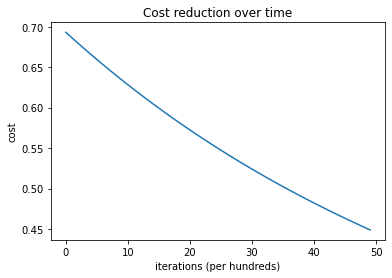

In [28]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()